In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
price_features = pd.read_csv("../data/output/price_features.csv")
storage_features = pd.read_csv("../data/output/storage_features.csv")

df = pd.merge(price_features, storage_features, on=['Week', 'Year'], how='inner')
df

,Price_Mbtu,Year,DayOfYear,LogReturn,Week,Storage_Bcf,storage_change,%_change,5_yr_weekly_storage_avg,storage_deviation,storage_ratio,storage_change_4_week_roll,storage_deviation_4_week_roll
0,4.335,2014,17,0.037368,3,2424,-105.0,-4.151839,2716.4,-292.4,0.892358,-161.75,-283.15
1,4.672,2014,24,0.074866,4,2184,-240.0,-9.900990,2542.6,-358.6,0.858963,-197.75,-307.70
2,5.078,2014,31,0.083330,5,1924,-260.0,-11.904762,2370.8,-446.8,0.811540,-223.25,-357.65
3,5.003,2014,38,-0.014880,6,1693,-231.0,-12.006237,2183.2,-490.2,0.775467,-209.00,-397.00
4,4.932,2014,45,-0.014293,7,1444,-249.0,-14.707620,2024.6,-580.6,0.713227,-245.00,-469.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.885,2024,68,0.062383,10,2325,-9.0,-0.385604,1910.6,414.4,1.216895,-51.25,379.30
530,1.705,2024,75,-0.100363,11,2332,7.0,0.301075,1875.2,456.8,1.243601,-34.50,405.50
531,1.698,2024,82,-0.004114,12,2296,-36.0,-1.543739,1862.8,433.2,1.232553,-19.50,423.65
532,1.668,2024,89,-0.017826,13,2259,-37.0,-1.611498,1855.8,403.2,1.217265,-18.75,426.90


Text(0.5, 1.0, 'Feature Correlation Heatmap')

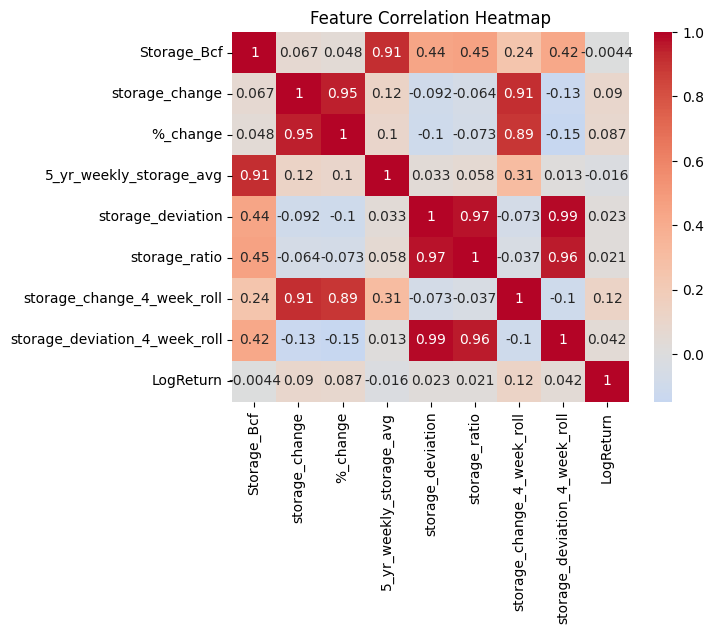

In [4]:
features = ['Storage_Bcf', 'storage_change', '%_change', '5_yr_weekly_storage_avg', 'storage_deviation', 'storage_ratio', 'storage_change_4_week_roll', 'storage_deviation_4_week_roll']
returns = ['LogReturn']
heatmap_df = df[features + returns]
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")

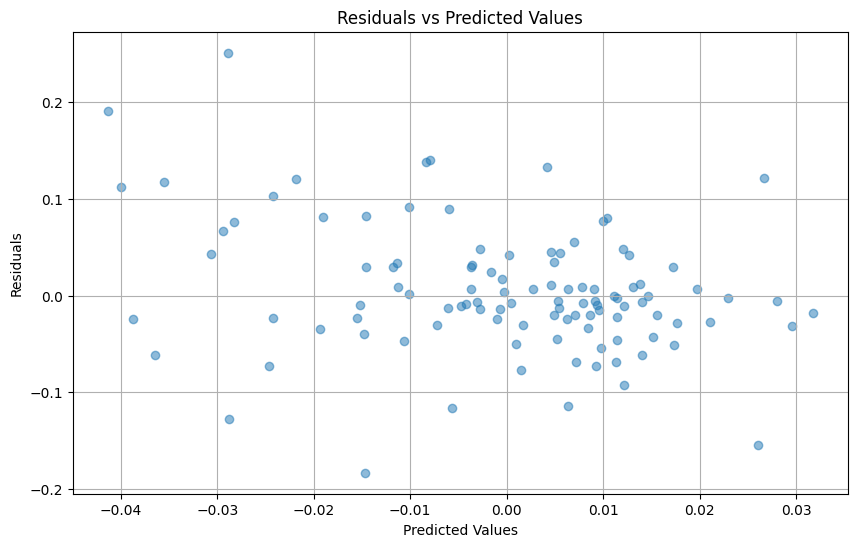

0.07717872059972464

In [8]:
features_df = df[features]
target_df = df[returns]

x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
resid = y_test- pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred, resid, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()
model.score(x_train, y_train)

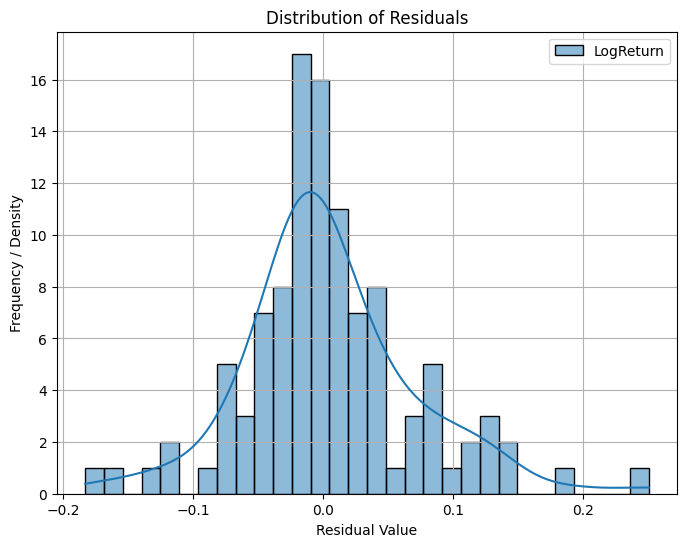

In [9]:

plt.figure(figsize=(8, 6))
sns.histplot(resid, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

In [10]:
(y_test * pred > 0).mean()


LogReturn    0.476636
dtype: float64